<a href="https://colab.research.google.com/github/AhamedShimak/pytorch/blob/main/pytorch_workflow_code_along.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Initiating Pytorch

### Imports

In [1]:
import torch
from torch import nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


###MY DETAILS FUNCTION

In [2]:
import torch
def details(tensor):
  print("")
  print("Shape: ",tensor.shape)
  print("Dimentions: ",tensor.ndim)
  print("###########")
  print(tensor)
  print("###########")
  print("Tensor Data type: ",tensor.dtype)
  print("Device: ",tensor.device)
  print("")

def details_plot(train_data, 
                     train_labels, 
                     test_data, 
                     test_labels,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

###GPU

In [3]:
!nvidia-smi
print(torch.cuda.is_available())
#setup device agnostic code
device="cuda" if torch.cuda.is_available() else "cpu"
print(device)

/bin/bash: nvidia-smi: command not found
False
cpu


##Linear Regression


In [4]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias 

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [5]:
# Create train/test split
train_split = int(0.8 * len(X)) # 80% of data used for training set, 20% for testing 
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [6]:
#details_plot(X_train,y_train,X_test,y_test,y_preds)

##Building the model

In [7]:
class LinearRegressionModel(nn.Module):
  def __init__(self, *args, **kwargs) -> None:
    super().__init__(*args, **kwargs)
    self.weights =nn.Parameter(torch.randn(1))
    self.bias =nn.Parameter(torch.randn(1))

    #foward method to define the computation in model

  def forward(self,x:torch.Tensor)->torch.Tensor:
    return self.weights*x +self.bias


### pytorch model building essential
torch.nn
torch.nn.Paramenter
torch.nn.Module this is base class
torch.optim - optimizer
def forward() we have to over write


##Content of model

In [105]:
torch.manual_seed(19)

#cteate an instance of our model

model_instance_1=LinearRegressionModel()

In [106]:
list(model_instance_1.parameters())

[Parameter containing:
 tensor([-0.0021], requires_grad=True),
 Parameter containing:
 tensor([-0.2836], requires_grad=True)]

In [107]:
model_instance_1.state_dict()

OrderedDict([('weights', tensor([-0.0021])), ('bias', tensor([-0.2836]))])

##Make the prediction /Inference

In [108]:
with torch.inference_mode():
  y_preds=model_instance_1(X_test)

with torch.no_grad():
  y_preds=model_instance_1(X_test)

y_preds

y_preds_simple=model_instance_1(X_test)

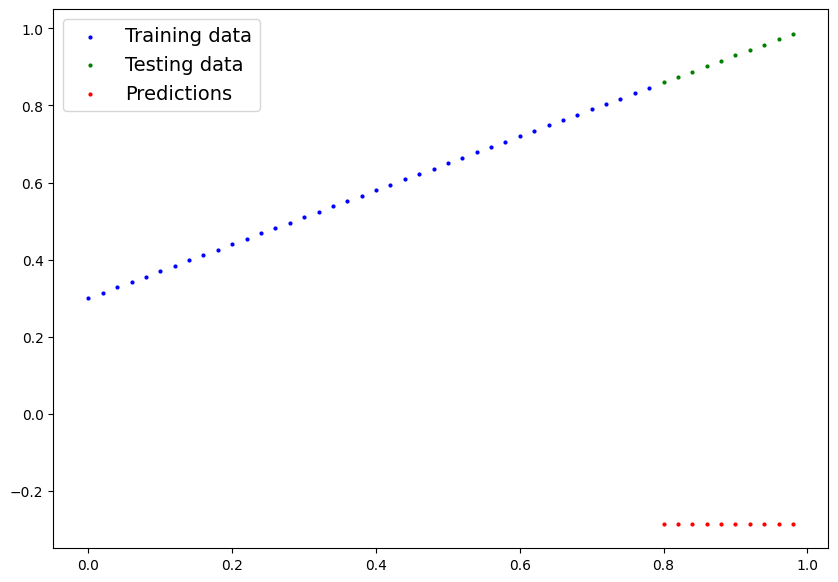

In [109]:
details_plot(X_train,y_train,X_test,y_test,y_preds)

In [110]:
y_preds_simple

tensor([[-0.2853],
        [-0.2853],
        [-0.2854],
        [-0.2854],
        [-0.2855],
        [-0.2855],
        [-0.2855],
        [-0.2856],
        [-0.2856],
        [-0.2857]], grad_fn=<AddBackward0>)

##Training the model

Loss func and opt
Training loop testing loop

In [111]:
#loss_func=nn.L1Loss()
loss_func=nn.MSELoss()
opt_func= torch.optim.SGD(model_instance_1.parameters(), lr=0.02)

##Building the training loop

In [112]:
print(list(model_instance_1.parameters()))
model_instance_1.state_dict()

[Parameter containing:
tensor([-0.0021], requires_grad=True), Parameter containing:
tensor([-0.2836], requires_grad=True)]


OrderedDict([('weights', tensor([-0.0021])), ('bias', tensor([-0.2836]))])

Steps
0. Loop throug the data
1. set to training mode
2. Forward pass
3. Calculate the loss(pred to ground truth)
4. optimizer zer grad
5. loss backward .. back propogation
6. optimizer step - use opt and adjust parameter ... grad desent


Epoc:0 Train loss: 3.4450677866004753e-09 Test loss: 1.5006463627287303e-08
Epoc:10 Train loss: 3.317893071397293e-09 Test loss: 1.4421236649297953e-08
Epoc:20 Train loss: 3.1955216250878493e-09 Test loss: 1.3887141214752319e-08
Epoc:30 Train loss: 3.085952382519963e-09 Test loss: 1.3431798784324656e-08
Epoc:40 Train loss: 2.9790643285565466e-09 Test loss: 1.2984159525331052e-08
Epoc:50 Train loss: 2.873615345677649e-09 Test loss: 1.2550620098750187e-08
Epoc:60 Train loss: 2.770416340780457e-09 Test loss: 1.2118364978164209e-08
Epoc:70 Train loss: 2.669744425531917e-09 Test loss: 1.1670495680959903e-08
Epoc:80 Train loss: 2.571443502574766e-09 Test loss: 1.1213868056358933e-08
Epoc:90 Train loss: 2.4753785687892105e-09 Test loss: 1.0776973979886861e-08
Epoc:100 Train loss: 2.3830790674139735e-09 Test loss: 1.0368739644661673e-08
Epoc:110 Train loss: 2.3023372097696893e-09 Test loss: 1.0024329810676136e-08
Epoc:120 Train loss: 2.2234805108212186e-09 Test loss: 9.686317525847699e-09
Epoc

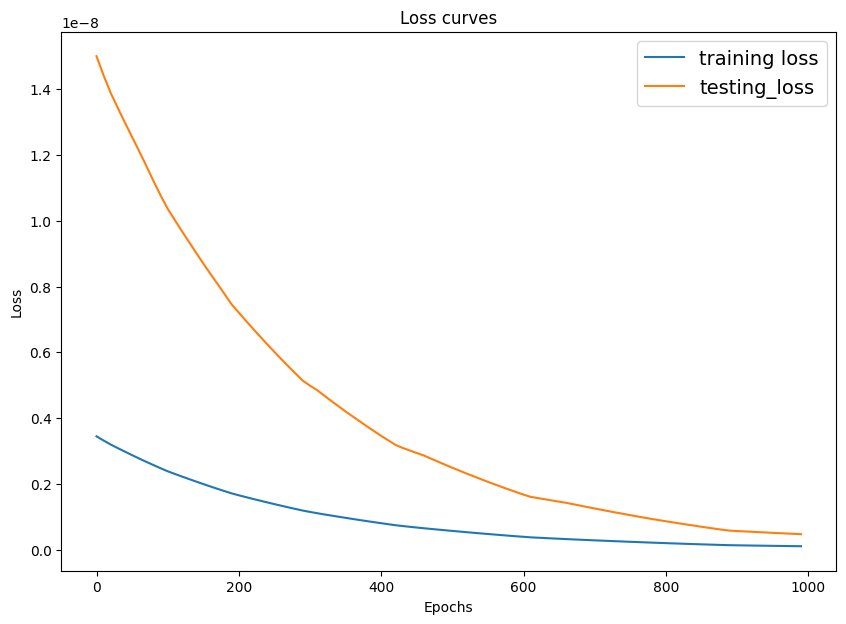

In [123]:
epochs =1000
epoch_track=[]
training_loss_track=[]
testing_loss_track=[]

for epoch in range(epochs):
  ####################
  #1
  # set the model to train mode eval mode/train mode
  model_instance_1.train() #set all para that require grad to set require grad
  #2
  y_pred=model_instance_1(X_train)
  #3
  loss= loss_func(y_pred,y_train)
  #4
  opt_func.zero_grad( )
  #5
  loss.backward()
  #6
  opt_func.step()
  
  ################
  #testing 
  model_instance_1.eval()
  with torch.inference_mode():
    # do forwrd
    test_pred=model_instance_1(X_test)

    #calc loss
    test_loss =loss_func(test_pred,y_test)
  if epoch%10==0:
    epoch_track.append(epoch)
    training_loss_track.append(loss.detach())
    testing_loss_track.append(test_loss.detach())

    print(f"Epoc:{epoch} Train loss: {loss} Test loss: {test_loss}")

#plot
plt.figure(figsize=(10, 7))
plt.plot(epoch_track, training_loss_track, label="training loss")
plt.plot(epoch_track, testing_loss_track, label="testing_loss")
plt.title("Loss curves")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(prop={"size": 14});


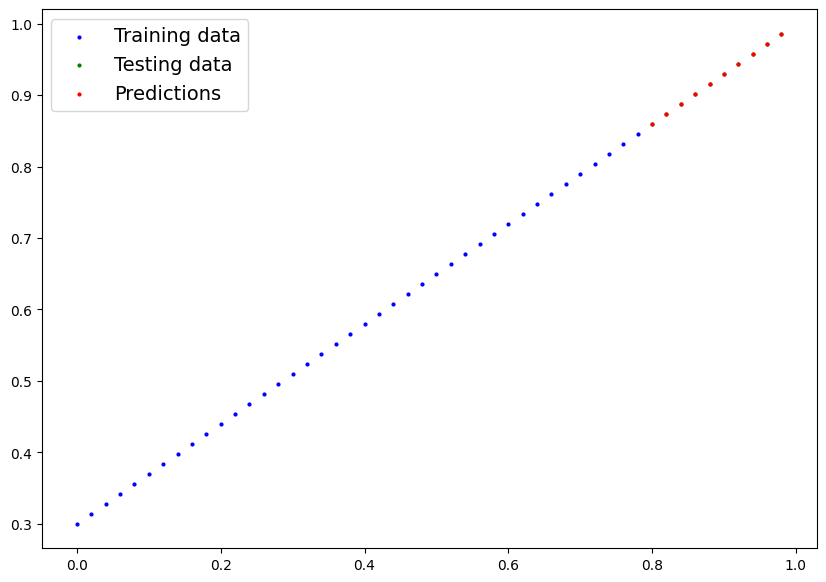

In [124]:
with torch.inference_mode():
  y_preds=model_instance_1(X_test)
details_plot(X_train,y_train,X_test,y_test,y_preds)

In [125]:
model_instance_1.state_dict()

OrderedDict([('weights', tensor([0.7000])), ('bias', tensor([0.3000]))])